In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Exploratory data analysis

In [4]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [25]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


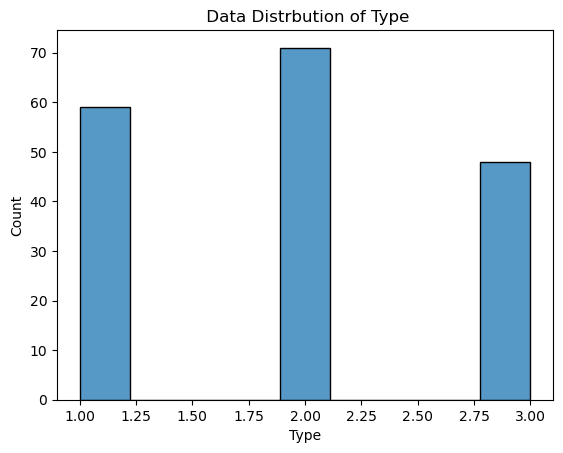

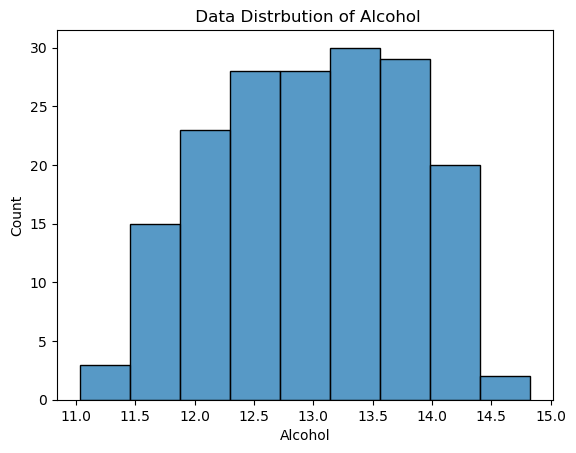

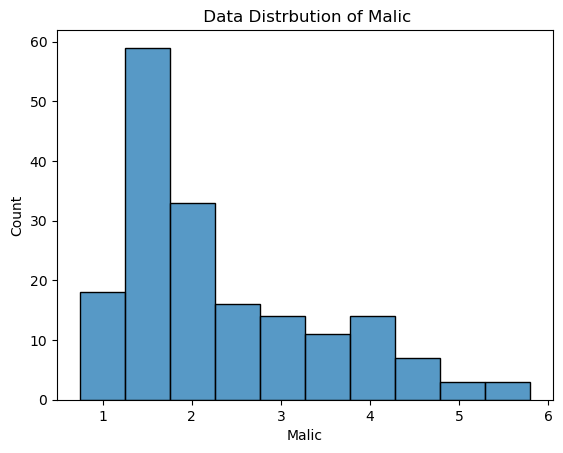

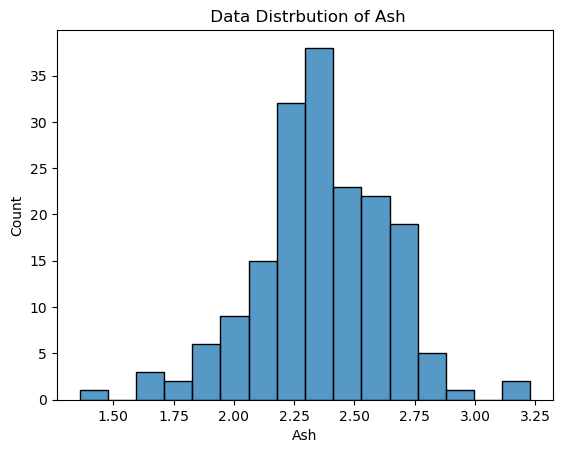

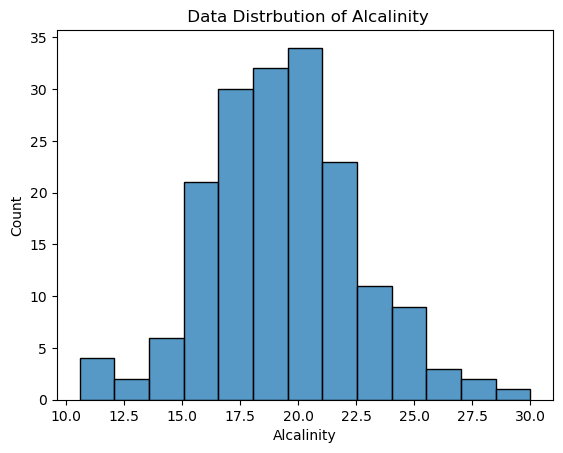

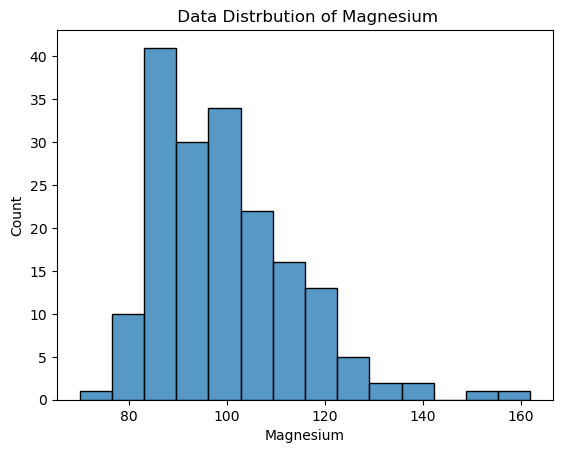

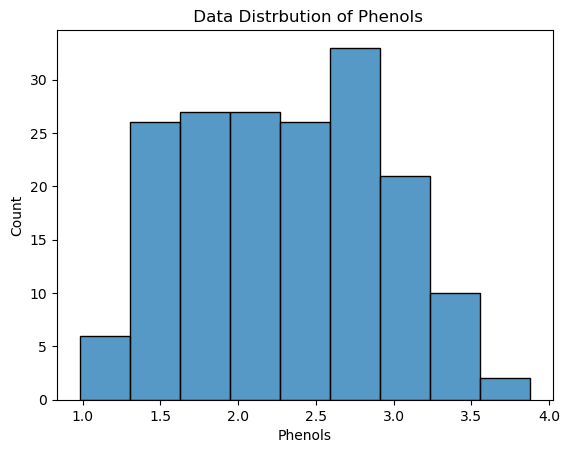

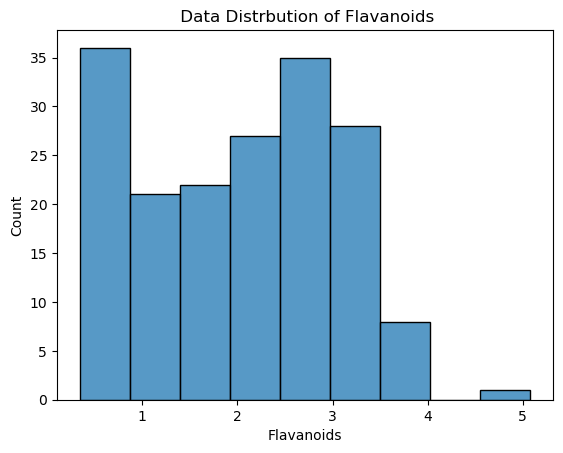

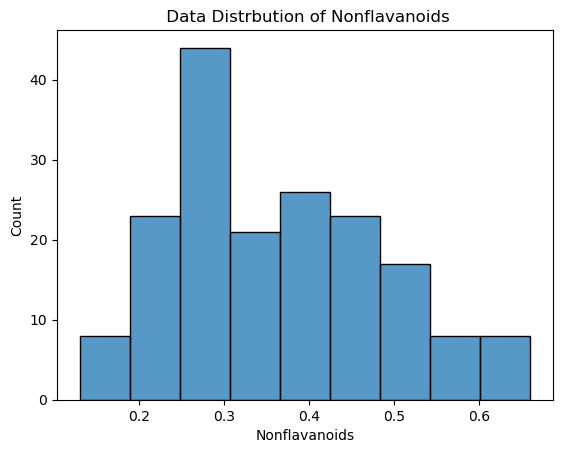

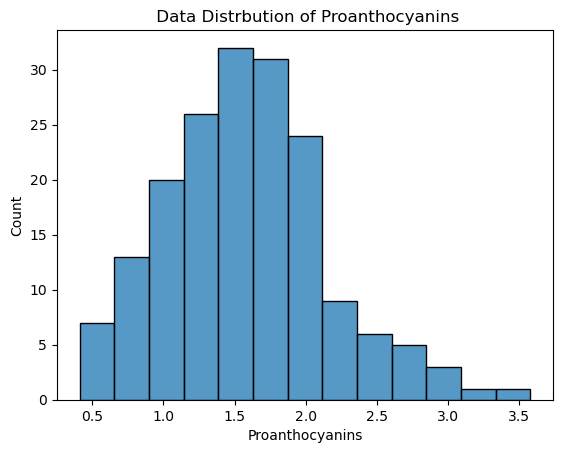

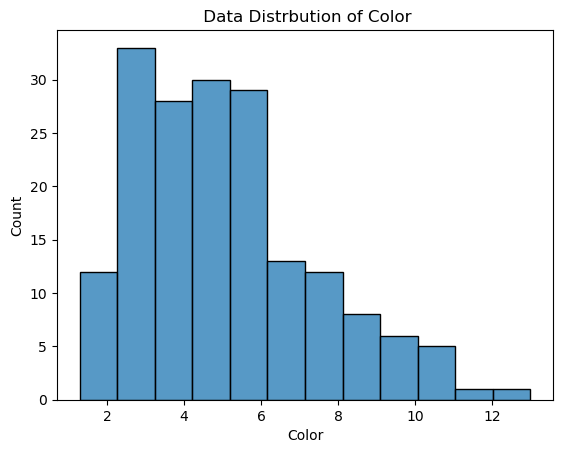

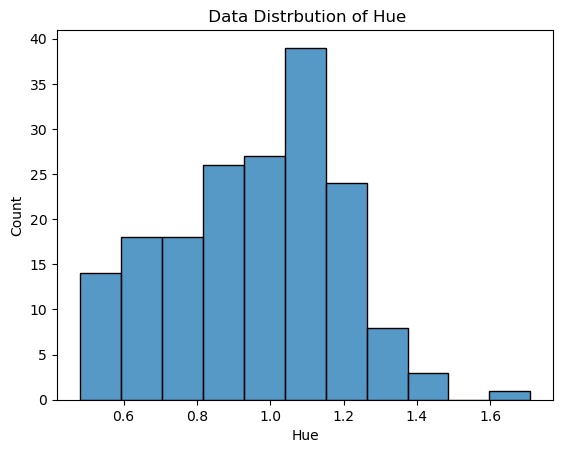

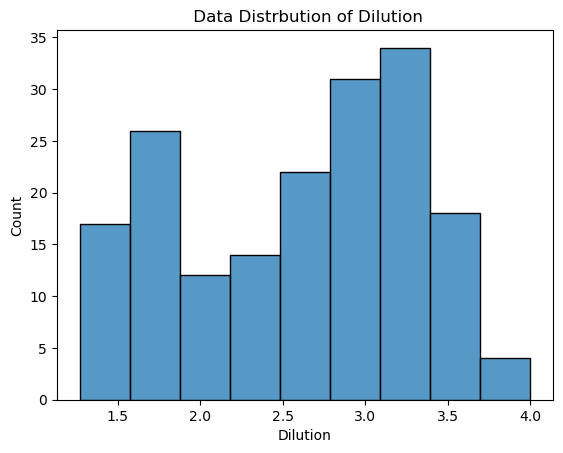

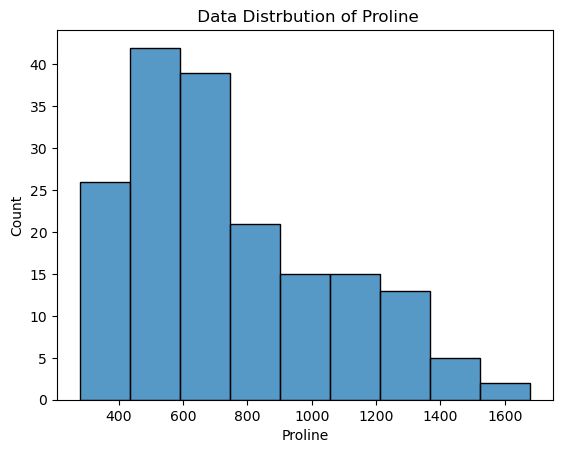

In [29]:
for i in df.columns:
    sns.histplot(df[i])
    plt.title(f' Data Distrbution of {i}')
    plt.show()

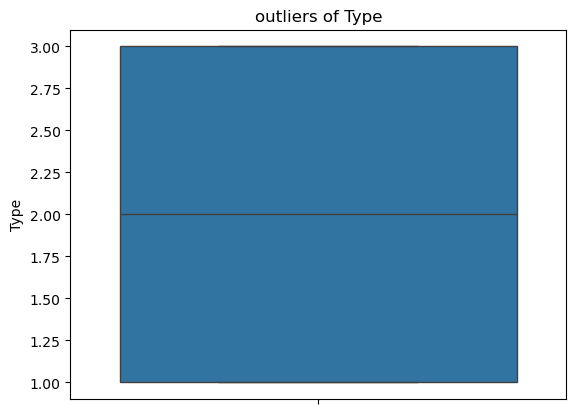

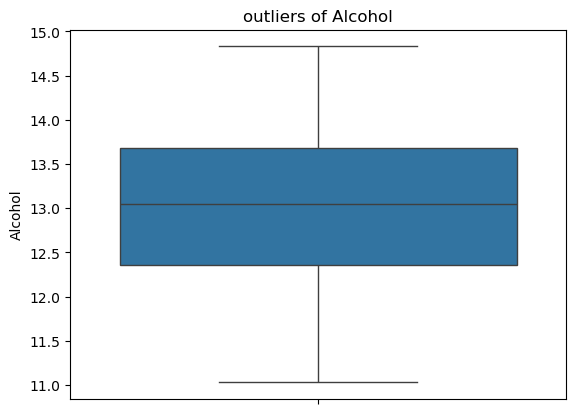

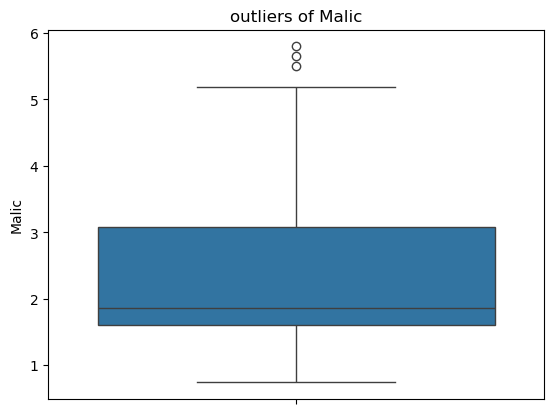

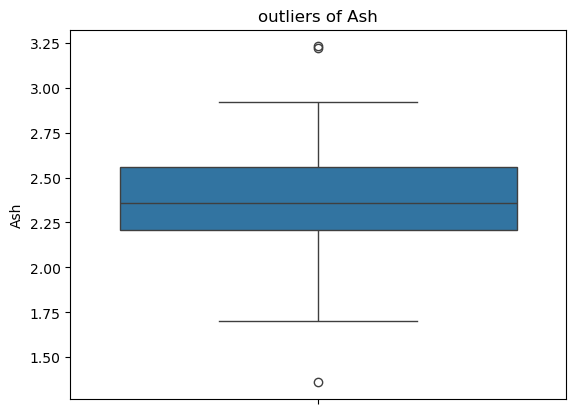

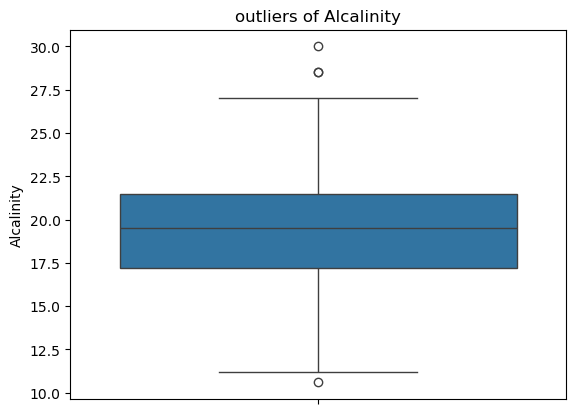

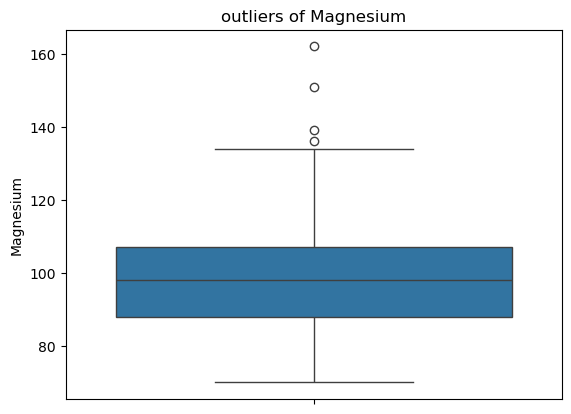

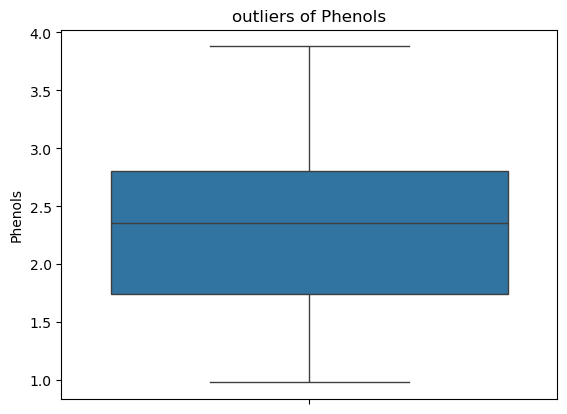

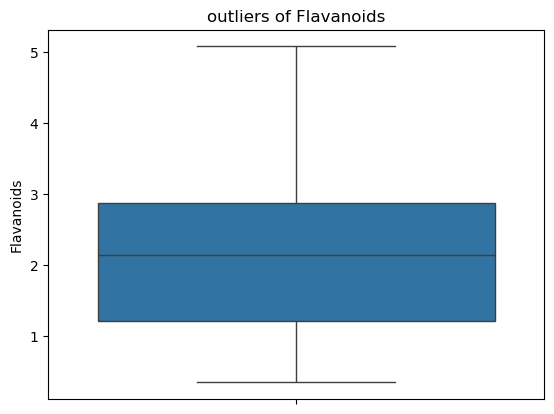

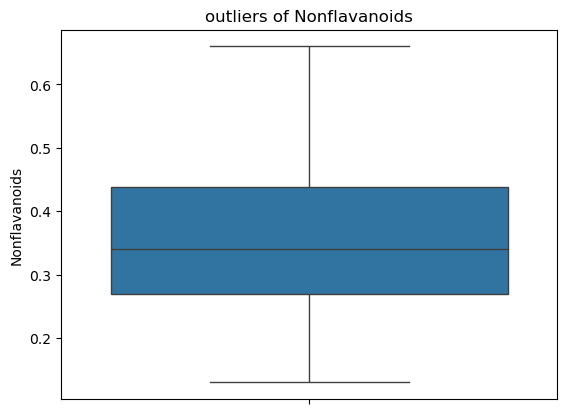

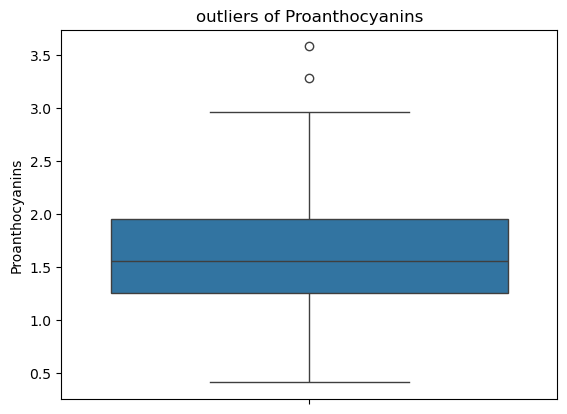

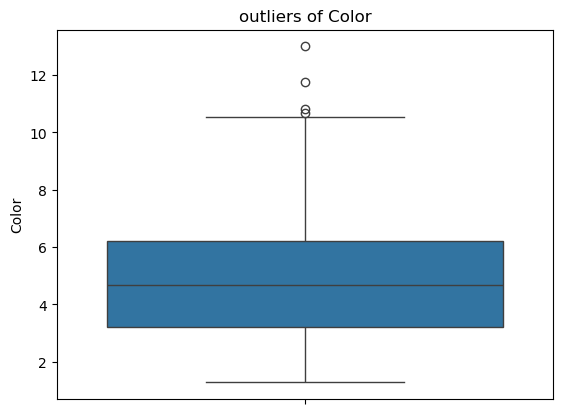

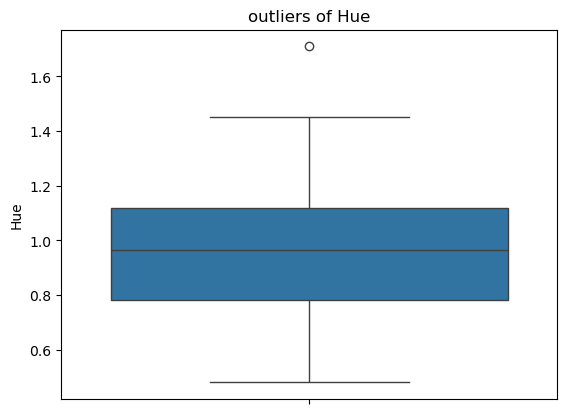

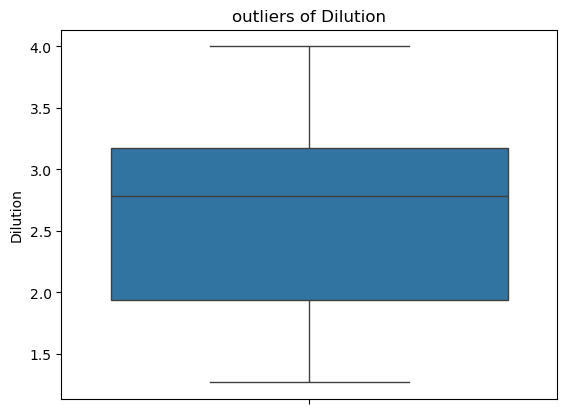

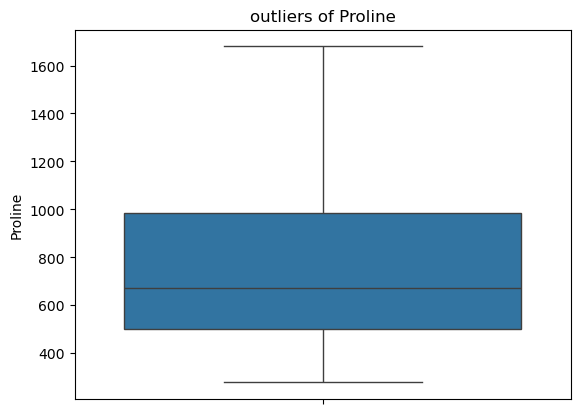

In [33]:
## boxplot 
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(f'outliers of {i}')
    plt.show()

In [22]:
## correlation between features
correlation=df.corr()

<Axes: >

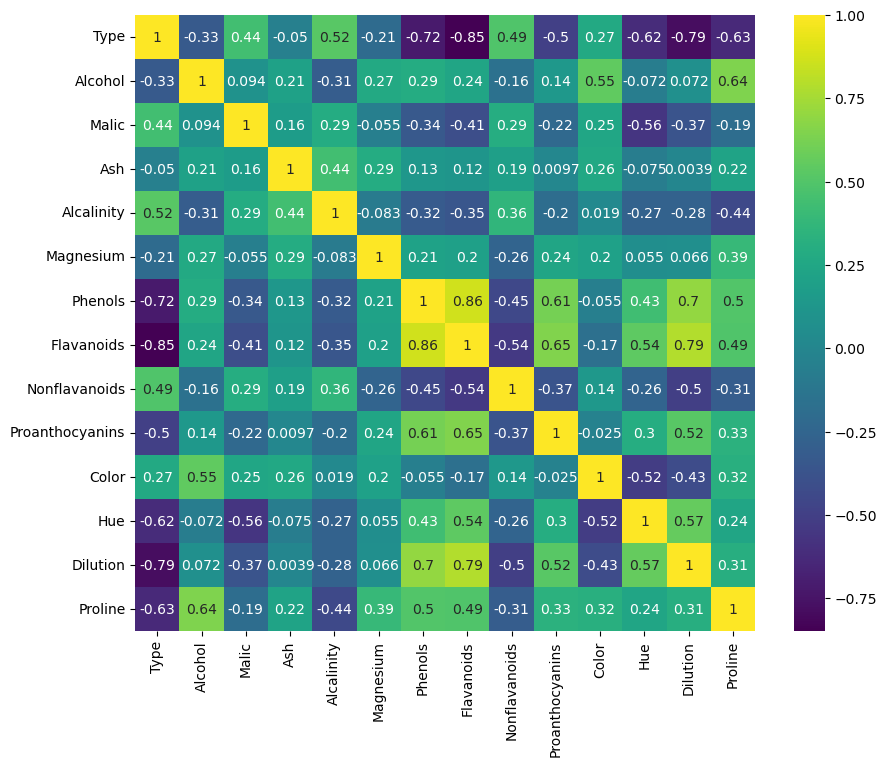

In [42]:
##heatmap to visulize the correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='viridis')

##  Dimensionality Reduction with PCA:

In [43]:
target=df['Type']
features=df.drop(columns=['Type'])

In [34]:
## standardizing th features
scale=StandardScaler()

In [50]:
scaled=scale.fit_transform(features)

In [51]:
pca=PCA()

In [52]:
pca.fit(scaled)

PCA()

In [59]:
## to determine the optimal number of principal components
## explained variance ratio
exp_var=pca.explained_variance_ratio_
exp_var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [58]:
## cumulative explained variance
cum_exp=exp_var.cumsum()

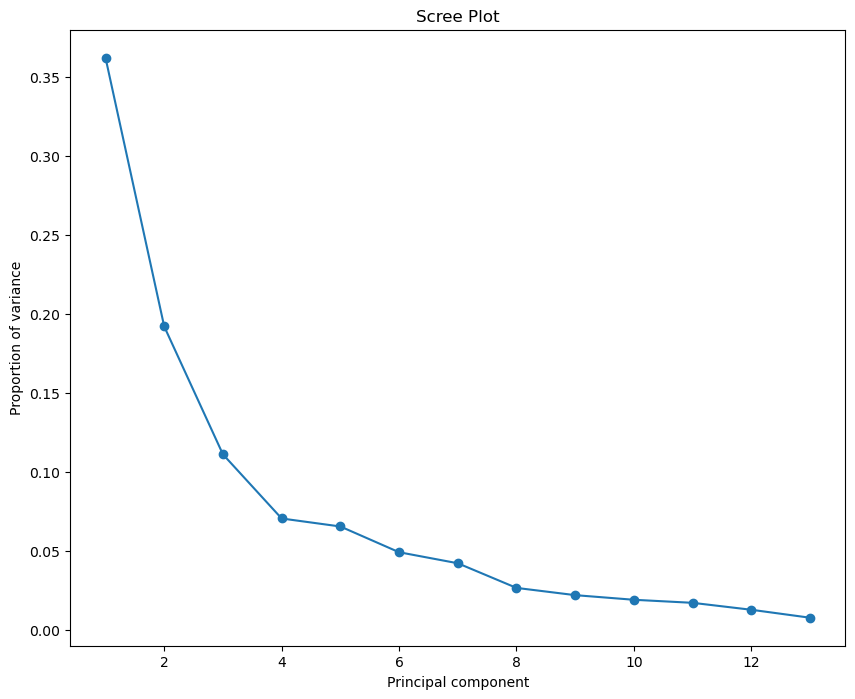

In [62]:
##  scree plot
plt.figure(figsize=(10,8))
plt.plot(range(1,len(exp_var)+1),exp_var,marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance')
plt.show()


In [63]:
n_components=4

In [68]:
pca=PCA(n_components=4)
pca_data=pca.fit_transform(scaled)
pca_data

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01,
         7.24902309e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01,
         5.67983308e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00,
         5.62703612e-02],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01,
         3.49381568e-01],
       [ 3.47973668e+00,  1.30233324e+00, -4.22735217e-01,
         2.68417600e-02],
       [ 1.75475290e+00,  6.11977229e-01, -1.19087832e+00,
      

## Clustering with Original Data:

In [69]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [80]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [95]:
og_data=kmeans.fit_predict(scaled)
og_data

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

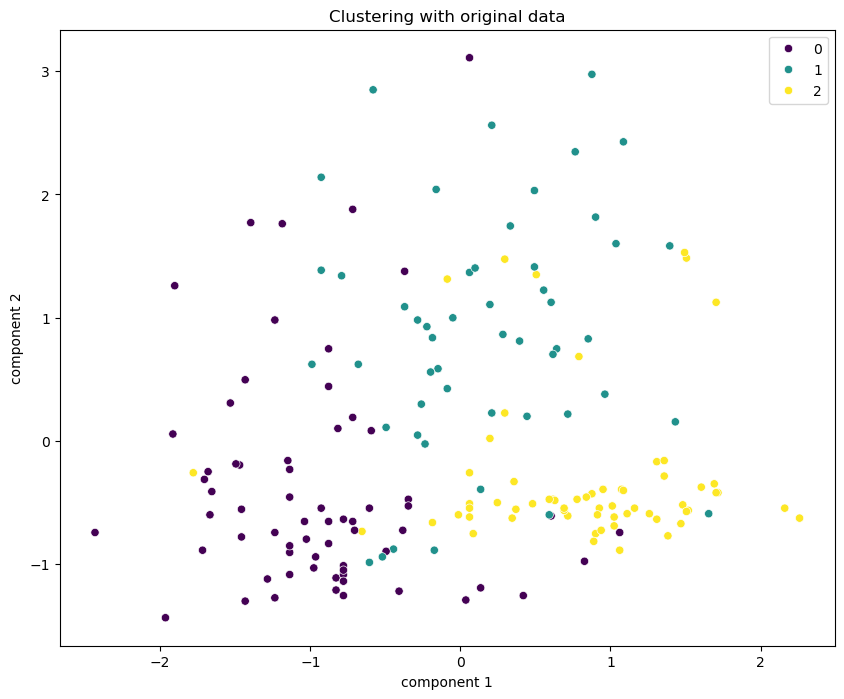

In [118]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=scaled[:,0],y=scaled[:,1],hue=og_data,palette='viridis')
plt.title('Clustering with original data')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [106]:
## evaluating clustered original data

In [109]:
kmeans_silhouette_score = silhouette_score(scaled,og_data)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.2848589191898987


## Clustering with PCA Data:

In [112]:
## applying KMeans with PCA data
applied_pca=kmeans.fit(pca_data)
applied_pca

KMeans(n_clusters=3, random_state=42)

In [116]:
pca_predict=kmeans.fit_predict(pca_data)
pca_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

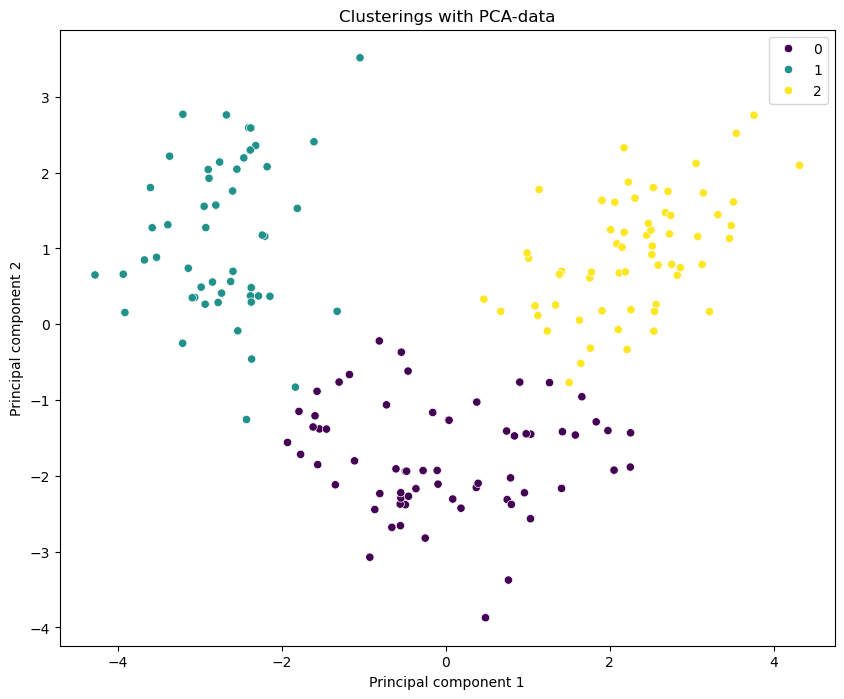

In [135]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=pca_predict,palette='viridis')
plt.title('Clusterings with PCA-data')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

## Comparison results:
#### Comparing the clustering results from PCA-transformed data with those from the original dataset.

In [137]:
## silhoutte score of PCA transformed data
kmeans_silhouette_score_p = silhouette_score(pca_data,pca_predict)
print("K-Means Silhouette Score of PCA data:", kmeans_silhouette_score_p)

K-Means Silhouette Score of PCA data: 0.4050568527010292


In [139]:
##  silhoutte score of original scaled data
kmeans_silhouette_score = silhouette_score(scaled,og_data)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.2848589191898987



* After comparing the silhouette scores of both PCA transformed data and the original data it is understandable that PCA transformed data gives improved performance
* Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.

## Conclusion and Insights


* In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.
We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance

### Practical Implications and Recommendations:
PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.
When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.
However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.
Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.
Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, computational resources, and complexity of the data.